# A/B Test Scenario: # 
A Pharma Company has developed a new medication intended to manage type 2 diabetes more effectively than existing treatments. The company wants to determine whether the new medication (Treatment Group) performs better than the current leading diabetes medication (Control Group) in terms of controlling blood sugar levels and minimizing side effects. The company decided to run an AB test and check the blood sugar levels post-medication.

Control Group (A): Patients in this group will receive the current leading diabetes medication.

Treatment Group (B): Patients in this group will receive the new medication.

### Simulate the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Setting the seed for reproducibility
np.random.seed(77)

# Simulate data for A/B test
sample_size = 1000

# Simulating blood sugar levels (mg/dL)
mean_A = np.random.randint(130, 150)  # Random integer between 130 and 150
std_A = np.random.randint(15, 25)     # Random integer between 15 and 25

mean_B = np.random.randint(120, 140)  # Random integer between 120 and 140
std_B = np.random.randint(15, 25)     # Random integer between 15 and 25

# Control Group (Current leading medication)
blood_sugar_A = np.random.normal(loc=mean_A, scale=std_A, size=sample_size)

# Treatment Group (New medication)
blood_sugar_B = np.random.normal(loc=mean_B, scale=std_B, size=sample_size)

# Generating random probabilities for side effects for each group
prob_side_effect_A = np.random.uniform(0.1, 0.4) # Random probability for control group
prob_side_effect_B = np.random.uniform(0.1, 0.4) # Random probability for treatment group

# Simulating side effects occurrence (0 = no side effects, 1 = side effects)
side_effects_A = np.random.choice([0, 1], size = sample_size, p = [1-prob_side_effect_A, prob_side_effect_A])
side_effects_B = np.random.choice([0, 1], size = sample_size, p = [1-prob_side_effect_B, prob_side_effect_B])

# Creating a DataFrame
simulated_data = pd.DataFrame({
    'Group': ['Control'] * sample_size + ['Treatment'] * sample_size,
    'Blood Sugar Level': np.concatenate([blood_sugar_A, blood_sugar_B]),
    'Side Effects': np.concatenate([side_effects_A, side_effects_B])
})

simulated_data.head()

,Group,Blood Sugar Level,Side Effects
0,Control,127.987038,1
1,Control,162.557550,0
2,Control,109.331193,0
3,Control,146.006717,0
4,Control,96.138777,0


## Primary metric: Blood Sugar Level ##
### Hypothesis ###

Null hypothesis (H0): there is no significance difference in controlling blood sugar levels between the current and new medication.


Alternative hypothesis (H1): the blood sugar level for the new medication is significantly lower than the blood sugar level for the current medication.

$$ H_0: µ_A = µ_B $$
$$ H_1: µ_B < µ_A $$

In [4]:
print("Average blood sugar level:")
simulated_data.groupby("Group")["Blood Sugar Level"].mean()

Average blood sugar level:


Group
Control      140.096860
Treatment    120.719803
Name: Blood Sugar Level, dtype: float64

### Plot the blood sugar level distribution

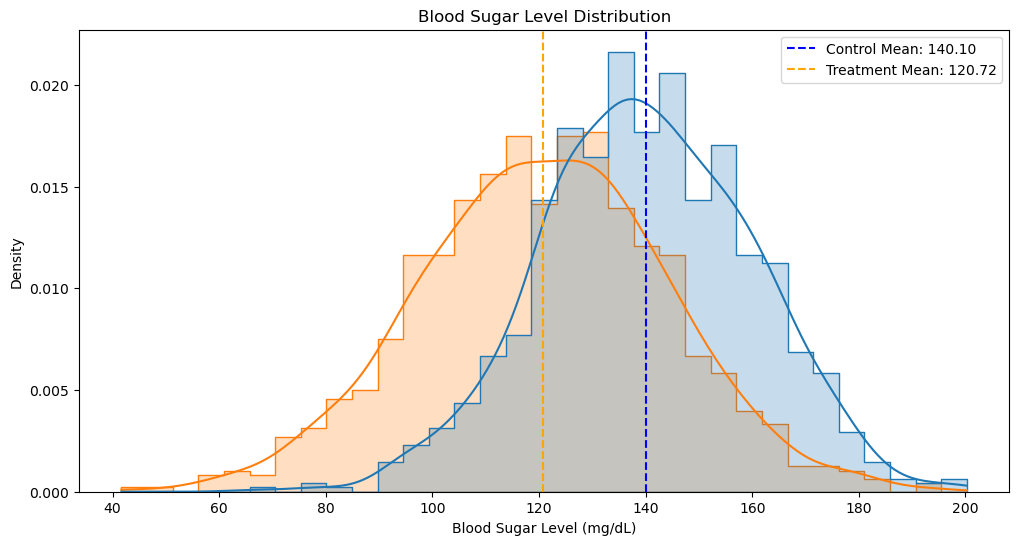

In [5]:
mean_control = simulated_data[simulated_data['Group'] == 'Control']['Blood Sugar Level'].mean()
mean_treatment = simulated_data[simulated_data['Group'] == 'Treatment']['Blood Sugar Level'].mean()

# Plot the blood sugar level distribution
plt.figure(figsize = (12, 6))

sns.histplot(simulated_data, x = 'Blood Sugar Level', hue = 'Group', element = 'step', stat = 'density', common_norm=False, kde = True)

plt.axvline(mean_control, color = 'blue', linestyle = '--', label = f'Control Mean: {mean_control:.2f}')
plt.axvline(mean_treatment, color = 'orange', linestyle = '--', label = f'Treatment Mean: {mean_treatment:.2f}')
plt.title('Blood Sugar Level Distribution')
plt.xlabel('Blood Sugar Level (mg/dL)')
plt.ylabel('Density')
plt.legend()
plt.show()

Is the average blood sugar level of the treatment group significantly lower than that of the control group?

### Perform a t-test

In [6]:
# Set a significance level
alpha = 0.01

# Perform t-test for blood sugar levels
t_stat, p_value = ttest_ind(blood_sugar_B, blood_sugar_A, alternative='less')

print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the control and the treatment group.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the control and the treatment group.")

T-statistic: -20.077798533351217
P-value: 3.96989036396207e-82
Reject the null hypothesis. There is a significant difference between the control and the treatment group.


## Secondary metric: Side Effects ##
### Hypothesis ###
The hypothesis is that the new medication will show have fewer side effects compared to the current medication.

Null hypothesis (H0): there is no significance difference in the proportion of side effects between the current and new medication.


Alternative hypothesis (H1): the proportion of side effects for the new medication is significantly lower than the proportion of side effects for the current medication.

$$ H_0: p_A = p_B $$
$$ H_1: p_B < p_A $$

In [7]:
mean_side_effects_A = side_effects_A.mean()
mean_side_effects_B = side_effects_B.mean()

print("Proportion of subjects with side effects in the Control group:", mean_side_effects_A)
print("Proportion of subjects with side effects in the Treatment group:", mean_side_effects_B)

Proportion of subjects with side effects in the Control group: 0.158
Proportion of subjects with side effects in the Treatment group: 0.264


### Plot the side effects occurance for the control and for the treatment group

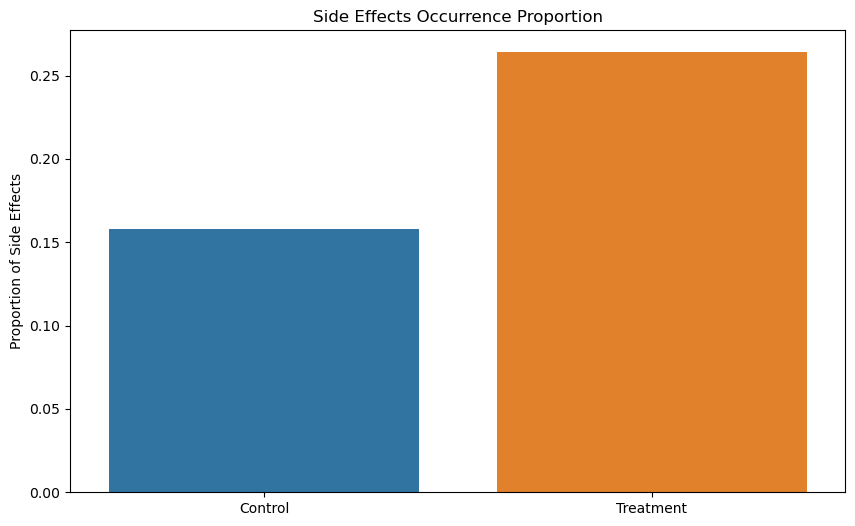

In [8]:
# Plot the side effects occurrence
side_effects_proportions = [mean_side_effects_A, mean_side_effects_B]

plt.figure(figsize = (10, 6))

sns.barplot(x = ['Control', 'Treatment'], y = side_effects_proportions)

plt.title('Side Effects Occurrence Proportion')
plt.ylabel('Proportion of Side Effects')
plt.show()

Is the proportion of subjects with side effects in the Treatment group significantly lower than the proportion of subjects with side effects in the Control group?

### Perform a z-test

In [15]:
# Set a significance level
alpha = 0.01

# Perform a z-test for proportion for side effects
count = [np.sum(side_effects_B), np.sum(side_effects_A)]
nobs = [len(side_effects_B), len(side_effects_A)] 

z_stat, p_value = proportions_ztest(count, nobs, alternative = "smaller")

print("Z-statistic:", z_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the control and the treatment group.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the control and the treatment group.")

Z-statistic: 5.809130571242219
P-value: 0.999999996860095
Fail to reject the null hypothesis. There is no significant difference between the control and the treatment group.
